In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import sys 

# We need to solve this once and for all
sys.path.append('/Users/sdea/Coding/pyCASINO/pycasino')

import functions, constants, utils

In [2]:
sim_param = utils.SimulationParameters()

sim_param.simulation_type = "interface"
sim_param.print_params()

Simulation Parameters:
------------------------------
Simulation type                    : interface
E_beam (keV)                       : 30
Z (Atomic number)                  : 14
A (Atomic weight, g/mol)           : 28.0855
rho (Density, g/cm³)               : 2.33
x (Initial x-coordinate)           : 0
y (Initial y-coordinate)           : 0
theta (Incidence angle, degrees)   : 0
N_electrons (Number of electrons)  : 10000
max_events (Maximum scattering events): 1000


In [3]:
# Getting gold and carbon

sim_param.N_electrons = 1000
sim_param.E_beam = 10
sim_param.Z = [6, 79]
sim_param.rho = [2.267, 19.32]
sim_param.A = [12.011, 196.966569]

sim_result = functions.get_bulk_results(sim_param)

N Electrons: 100%|██████████| 1000/1000 [00:04<00:00, 225.97it/s]


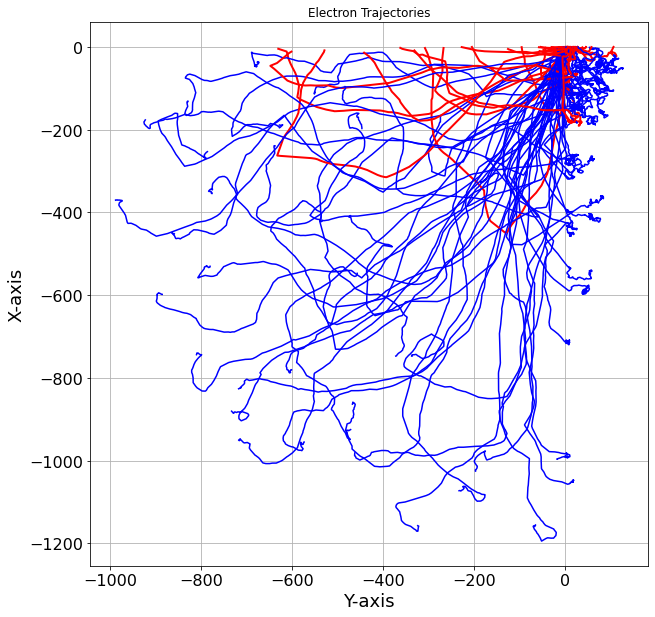

In [4]:
# Plot the results
utils.plot_simulation_results(sim_result)

In [6]:
utils.find_global_min_max(sim_result.traj_list.x_list)

AttributeError: 'list' object has no attribute 'x_list'

In [10]:
def find_y_extremes(trajectories):
    """
    Finds the global minimum and maximum y value considering all electron trajectories resulting from a simulation.

    Parameters
    ----------
    nested_list : list of list
        A list of lists containing numerical values.

    Returns
    -------
    list
        A list containing two elements:
        - The global minimum value (float or int).
        - The global maximum value (float or int).

    Raises
    ------
    ValueError
        If the input list is empty or contains no numerical values.
    """
    list_max = []
    list_min = []
    for traj in trajectories:
        y_coors = np.array(traj.y_list)
        if len(y_coors) > 0:
            list_max.append(np.max(y_coors))
            list_min.append(np.min(y_coors))
        else:
            list_max.append(0)
            list_min.append(0)
                

    
    global_min = min(list_min)
    global_max = max(list_max)
    
    return [global_min, global_max]

In [11]:
find_y_extremes(sim_result.traj_list)

[-0.00011563038314470727, 1.5203796278509802e-05]

In [ ]:
for traj in sim_result.traj_list:
    print(traj.y_list)